# Sentiment Analysis Project
### Alexander Bartel

## 1. Importing and Creating Text Column
In this section we'll import the data and concatenate all of the text features into one column.

In [1]:
# importing data
import pandas as pd
corona_train=pd.read_csv('Corona_NLP_train.csv', encoding_errors='replace')
corona_test=pd.read_csv('Corona_NLP_test.csv', encoding_errors='replace')

# concatenating all relevant text features
text_cols = ["Location", "TweetAt", "OriginalTweet"]
corona_train['tweet_Texts'] = corona_train[text_cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
corona_test['tweet_Texts'] = corona_test[text_cols].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
corona_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,tweet_Texts
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,London 16-03-2020 @MeNyrbie @Phil_Gahan @Chris...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,UK 16-03-2020 advice Talk to your neighbours f...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Vagabonds 16-03-2020 Coronavirus Australia: Wo...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,nan 16-03-2020 My food stock is not the only o...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"nan 16-03-2020 Me, ready to go at supermarket ..."


## 2. Cleaning and Pre-processing the Text
In this section we will take out stop words, special symbols, two and one letter words, dates, and times, and will lemmatize the word.

In [2]:
import re
# importing library of stop words
import spacy
nlp = spacy.load('en_core_web_sm')
stop_words = nlp.Defaults.stop_words
# filtering dates out of concatenated text feature
def clean_text(text):
    # The first regex attempts to filter out all times
    # whether or not it includes seconds,
    # whether or not it includes am or pm,
    # and whether or not there is a space between the end of the time and am or pm.
    text = re.sub(r'\d{1,2}:\d{2}:?\d{0,2}\s?(am|pm)?', "", text)
    # The second regex attempts to filter out dates
    # It looks for dates in with 1-2 digits for month and day
    # separated by either a slash or a hyphen, with 0-4 digits for year
    text = re.sub(r'\d{1,2}(/|-)\d{1,2}(/|-)?\d{0,4}', "", text)
    # The next looks for dates with a month name as any combination of three or more letters,
    # one or more spaces or commas, 
    # and then one to two digits optionally followed by more spaces and four digits.
    text = re.sub(r'[a-zA-Z]{3,}\s+\d{1,2}(\s|,|\.)+(\d{4}|\d{0})', "", text)
    # The fourth regex looks for a similar pattern, but with the year first.
    text = re.sub(r'\d{4}\s+[a-zA-Z]{3,}\s*\d{1,2}', "", text)
    # The final looks specifically for month as a string of letters at least three long,
    # one or more spaces, one or two digits for day, one or more spaces or commas, and 4 digits for year
    text = re.sub(r'[a-zA-Z]{3,}\s+\d{1,2}\s+\d{4}', "", text)
    # removing one and two letter words
    text = re.sub(r'\b[a-zA-Z]{1,2}\b', "", text)
    # Remove nan, @user, hashtags, punctuation, URL, or any non alpanumeric characters and separate word using a single space.
    text = re.sub("(nan)|(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text)
    # adding uniform spacing, removing stop words, and setting to lower case
    text = text.split()
    text = [word for word in text if word not in stop_words]
    text = ' '.join(text)  
    return text.strip().lower()
# applying clean_text function to our tweet text column
corona_train['tweet_Texts'] = corona_train['tweet_Texts'].apply(clean_text)
# dropping rows where tweet text is empty
corona_train = corona_train.dropna(subset=['tweet_Texts'])
# applying clean_text function to our tweet text column
corona_test['tweet_Texts'] = corona_test['tweet_Texts'].apply(clean_text)
# dropping rows where tweet text is empty
corona_test = corona_test.dropna(subset=['tweet_Texts'])

In [3]:
corona_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,tweet_Texts
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,london gahan
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,vagabonds coronavirus australia woolworths eld...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock please don panic there will enough ...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready supermarket outbreak not paranoid food s...


## 3. Extracting Tokens from the Text
In this section we'll look at some examples of the tokens in the text, and perform natural language processing on the tweets.

In [4]:
# concatenating training texts to perform part of speech tagging
all_train = ' '.join(corona_train['tweet_Texts'])
# cutting concatenated text to first million characters to fall within limits of natural language processor
all_train_trunc = all_train[:999999]

In [5]:
doc = nlp(all_train_trunc)

# Summarize the first 20 tokens
for token in doc[:20]:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

london london PROPN NNP compound xxxx True False
gahan gahan PROPN NNP compound xxxx True False
advice advice NOUN NN compound xxxx True False
talk talk NOUN NN compound xxxx True False
neighbours neighbour NOUN NNS compound xxxx True False
family family NOUN NN compound xxxx True False
exchange exchange NOUN NN compound xxxx True False
phone phone NOUN NN compound xxxx True False
numbers number NOUN NNS nsubj xxxx True False
create create VERB VBP ccomp xxxx True False
contact contact NOUN NN compound xxxx True False
list list NOUN NN compound xxxx True False
phone phone NOUN NN compound xxxx True False
numbers number NOUN NNS dobj xxxx True False
neighbours neighbour NOUN NNS dep xxxx True False
schools school NOUN NNS compound xxxx True False
employer employer NOUN NN compound xxxx True False
chemist chemist NOUN NN nsubj xxxx True False
set set VERB VBD conj xxx True False
online online ADJ JJ amod xxxx True False


## Visualizing the Dependency Parser
Visualizing the dependency parser and visualizing the named entities in the text.

In [6]:
from spacy import displacy
# for this we will just use one, we'll do the sixth tweet
doc2 = nlp(corona_train['tweet_Texts'][5])
# Visualize dependency parser for text
displacy.render(doc2, style="dep", jupyter = True)

In [7]:
# looking at the named entities in the document
i=0
for ent in doc.ents[:20]:
        print(ent.text, ent.start_char, ent.end_char, ent.label_)
        i=i+1

london gahan advice 0 19 ORG
australia 229 238 GPE
hours 286 291 TIME
19 303 305 CARDINAL
19 404 406 CARDINAL
36 506 508 CARDINAL
82 363649 516 525 CARDINAL
19 554 556 CARDINAL
35 696 698 CARDINAL
19 755 757 CARDINAL
today 836 841 DATE
19 864 866 CARDINAL
atlanta usa 867 878 ORG
19 889 891 CARDINAL
atlanta 915 922 GPE
weeks 950 955 DATE
monday 966 972 DATE
bhavnagar gujrat 1037 1053 ORG
19 1194 1196 CARDINAL
all month 1211 1220 DATE


In [8]:
# set types of entities to mark and color to use
options = {"ents": ['GEOLOCATION', 'MONEY', 'QUANTITY'], "colors": {'GEOLOCATION':'#82E0AA', 'MONEY':'#008000', 'QUANTITY':'#ADD8E6'}}

## 4. Lemmatizing the Text
In this section we will replace all of the tokens in the cleaned text with their lemmas. This will then be the tokenized text we use throughout the rest of the project.

In [9]:
corona_train['tweet_tokenized'] = [nlp(tweet) for tweet in corona_train['tweet_Texts']]

In [10]:
# defining a function to get the lemma for each token in a doc
def lemmatize(text):
    new_text = []
    for token in text:
        new_text.append(token.lemma_)
    new_text = ' '.join(new_text)
    return new_text
# get the lemmatized text for each doc using the function
corona_train['tweet_Texts'] = [lemmatize(text) for text in corona_train['tweet_tokenized']]

In [11]:
corona_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,tweet_Texts,tweet_tokenized
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,london gahan,"(london, gahan)"
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk neighbour family exchange phone nu...,"(advice, talk, neighbours, family, exchange, p..."
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,vagabonds coronavirus australia woolworth elde...,"(vagabonds, coronavirus, australia, woolworths..."
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock please don panic there will enough ...,"(food, stock, please, don, panic, there, will,..."
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready supermarket outbreak not paranoid food s...,"(ready, supermarket, outbreak, not, paranoid, ..."


## 5. Graphically Summarizing the Sentiment
We can see that there are more positive reviews than any other reviews, more negative than any others, and more neutral than either extremely positive or extremely negative. 

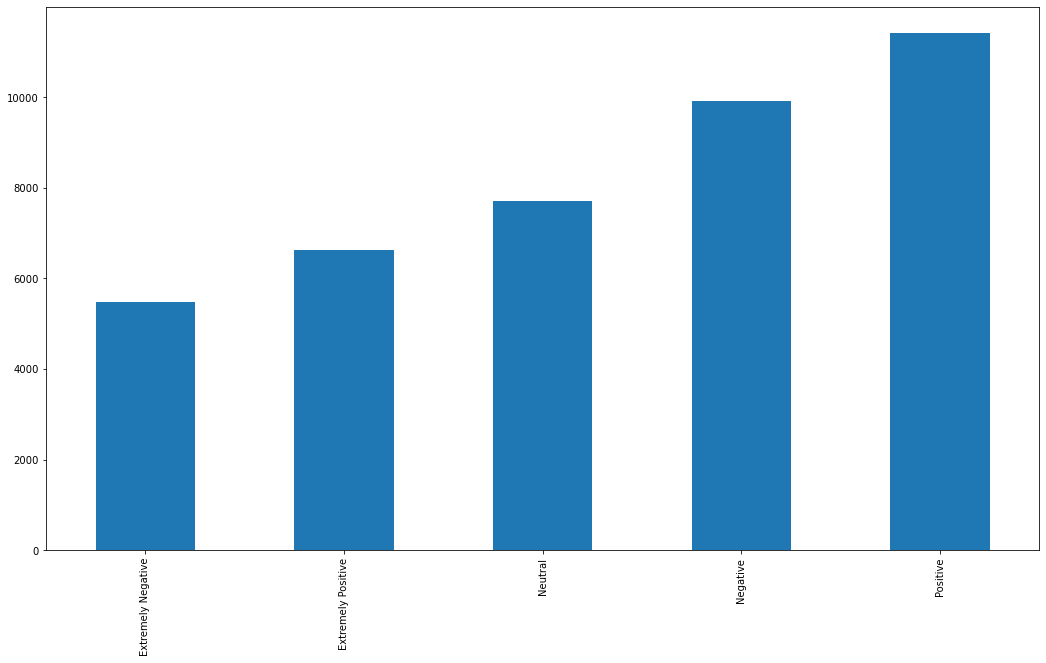

In [12]:
x = corona_train.Sentiment.value_counts().sort_values().plot(kind = 'bar', figsize=(17.8,10))

## 6. Graphically Summarizing the Length of the Tweets
We will use a boxplot, and then a histogram with a density plot to show the distibution of the length of the tweets.

In [13]:
# making a new column with the length of each cleaned tweet
corona_train['tweet_len'] = corona_train['tweet_Texts'].str.len()

Text(0.5, 1.0, 'Tweet Lengths Box Plot')

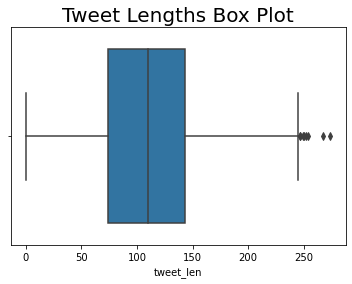

In [14]:
import seaborn as sns
# Box plot of tweet lengths
b = sns.boxplot(x=corona_train['tweet_len'])
b.set_title("Tweet Lengths Box Plot", fontsize= 20)

Text(0.5, 1.0, 'Tweet Lengths Histogram and Density Plot')

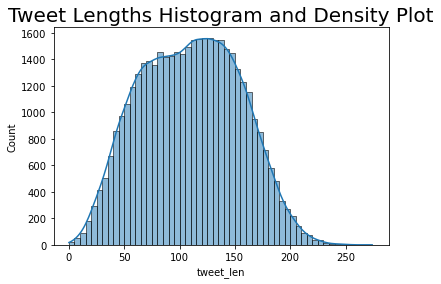

In [15]:
# histogram and density plot of tweet lengths
h = sns.histplot(data = corona_train, x='tweet_len', binwidth=5, kde=True)
h.set_title("Tweet Lengths Histogram and Density Plot", fontsize= 20)

## 7. Graphically Summarizing the Word Count of the Tweets
We will use a boxplot, and then a histogram with a density plot to show the distibution of the word count of the tweets.

In [16]:
# adding column with word count for each tweet
corona_train['word_count'] = corona_train['tweet_Texts'].str.split().str.len()

Text(0.5, 1.0, 'Word Count Box Plot')

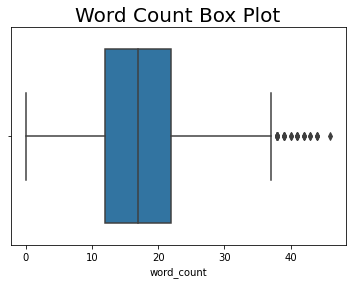

In [17]:
# Box plot of tweet word counts
b = sns.boxplot(x=corona_train['word_count'])
b.set_title("Word Count Box Plot", fontsize= 20)

Text(0.5, 1.0, 'Word Count Histogram and Density Plot')

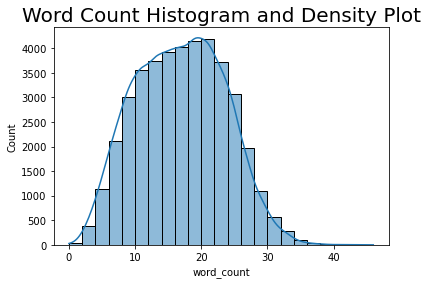

In [18]:
# histogram and density plot of word counts
h = sns.histplot(data = corona_train, x='word_count', binwidth=2, kde=True)
h.set_title("Word Count Histogram and Density Plot", fontsize= 20)

## 8. Graphically Summarizing Top 10 Unigrams and Bigrams
In this section we will look at the most common tokens. We've selected both unigrams and bigrams, so we will see which of these tokens show up the most in the corpus.

In [19]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# Define a function returning the top words
def get_top_tf_idf_words(df = corona_train, col = "tweet_Texts", use_idf = True, ngram_range =(1, 2), top_n=10):
    
    tf_idf = TfidfVectorizer(stop_words='english', ngram_range = ngram_range, use_idf = use_idf)
    # Fit and transform the corpus
    X_sparse_matrix = tf_idf.fit_transform(df[col])
    feature_names = np.array(tf_idf.get_feature_names())
    # Generate the tf-idf matrix
    tf_idf_sparse_matrix = tf_idf.transform(df[col])
    # Rank the matrix by tf-idf values and return the indices of the top_n values
    sorted_idx = np.argsort(tf_idf_sparse_matrix.data)[:-(top_n+1):-1]
    
    # Return the feature names and corresponding tf_idf values in a df
    return pd.DataFrame(
    {'feature': feature_names[tf_idf_sparse_matrix.indices[sorted_idx]],
     'tf_idf': tf_idf_sparse_matrix.data[sorted_idx],
    })

top_n = 10
# Generate top tf-idf bigrams for the text
top_tokens = get_top_tf_idf_words(df = corona_train, col = "tweet_Texts", top_n= top_n)

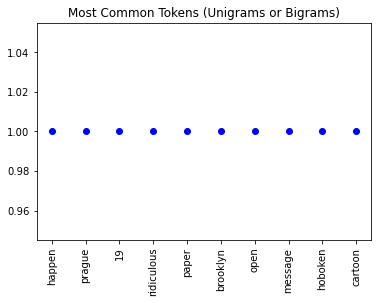

In [20]:
x=range(0, top_n)
import matplotlib.pyplot as plt
# Plot x and tf_idf using blue circle markers
plt.plot(x, top_tokens.tf_idf, 'bo')
plt.title('Most Common Tokens (Unigrams or Bigrams)')
# Set number of ticks for x-axis
plt.xticks(x,top_tokens.feature, rotation='vertical')
plt.show()

In [21]:
# Use the scattetext and spaCy libraries
import scattertext as st
from pprint import pprint

# Generate corpus before cleaning texts
corpus = st.CorpusFromPandas(corona_train, 
                              category_col='Sentiment', 
                              text_col='tweet_Texts',
                              nlp=nlp).build()

In [22]:
# Create the term frequency for the sentiments
term_freq_df = corpus.get_term_freq_df()
# combining positive and extremely positive into just positive
term_freq_df['Positive freq'] = term_freq_df['Positive freq']+term_freq_df['Extremely Positive freq']
# Create the positive score for the sentiment of positive review after cleaning the texts
term_freq_df['Positive score'] = corpus.get_scaled_f_scores('Positive' or 'Extremely Positive')
# Rank them by descending order
term_freq_df_freq = term_freq_df.sort_values(by= 'Positive freq', ascending=False)
term_freq_df_Score = term_freq_df.sort_values(by= 'Positive score', ascending=False)

## 9. Visualizing Terms most Commonly Associated with Positive Sentiment
In this section we will show the tokens that had the most occurences in documents of positive sentiment.

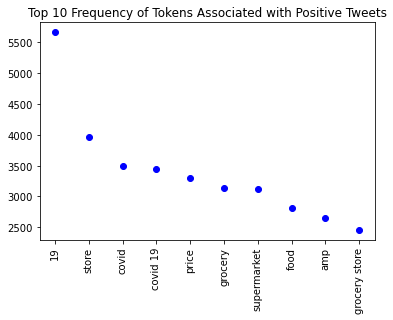

In [23]:
# Specify the top n tokens to plot
top_n = 10
term_freq_df_freq = term_freq_df_freq.head(top_n)

x = range(0, top_n)

# Plot x and tf using blue circle markers
plt.plot(x, term_freq_df_freq["Positive freq"], 'bo')
plt.title('Top 10 Frequency of Tokens Associated with Positive Tweets')
# Set number of ticks for x-axis
x_ticks_labels = term_freq_df_freq.index
plt.xticks(x,x_ticks_labels, rotation='vertical')
plt.show()

## 10. Visualizing Terms with Highest Positive Scores
In this section we will visualize the tokens that have the highest positive scores.

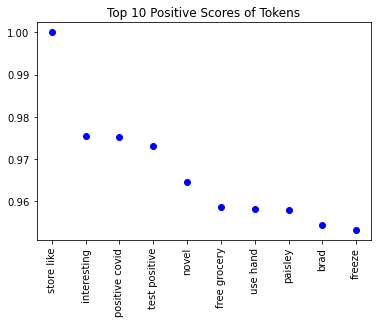

In [24]:
top_n = 10
term_freq_df_Score = term_freq_df_Score.head(top_n)

x = range(0, top_n)

# Plot x and tf using blue circle markers
plt.plot(x, term_freq_df_Score["Positive score"], 'bo')
plt.title('Top 10 Positive Scores of Tokens')
# Set number of ticks for x-axis
x_ticks_labels = term_freq_df_Score.index
plt.xticks(x,x_ticks_labels, rotation='vertical')
plt.show()

## 11. Converting tweet_Texts to a Matrix of Token Counts
In this section, we will generate a matrix of token counts from the tweet_Texts column using CountVectorizer.

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer(max_df=0.90, min_df=5, stop_words='english', ngram_range=(1,2))
# Create document word matrix
document_word_matrix_tf = tf_vectorizer.fit_transform(corona_train['tweet_Texts'])

## 12. TF-IDF Analysis
In this section we will do tf-idf analysis on the tweet texts.

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from numpy import dot
from numpy import linalg as LA

# Create a TfidfVectorizer Object using default parameters: use_idf=True, smooth_idf=True, sublinear_tf=False
tfidf_vectorizer = TfidfVectorizer(use_idf=True,smooth_idf=True, sublinear_tf=False)

# Fit to the corpus, then convert a collection of raw documents to a matrix of TF-IDF features.
tf_idf_matrix = tfidf_vectorizer.fit_transform(corona_train['tweet_Texts'])

print(f'The size of the tf_idf matrix for the texts = {tf_idf_matrix.get_shape()}')

The size of the tf_idf matrix for the texts = (41157, 33051)


## 13. Cosine Similarity
In this section we will take the 200th tweet and the 20,000th tweet and determine their cosine similarity.

In [27]:
tweet_text_1 = corona_train['tweet_Texts'][199]
tweet_text_2 = corona_train['tweet_Texts'][19999]
doc1 = nlp(tweet_text_1)
doc2 = nlp(tweet_text_2)
cos_sim = dot(doc1.vector, doc2.vector)/(LA.norm(doc1.vector)*LA.norm(doc2.vector))
print(f'The cosine similarity between the 200th and 20000th tweets is (rounded to 2 decimal places):')
print(round(cos_sim,2))

The cosine similarity between the 200th and 20000th tweets is (rounded to 2 decimal places):
0.73


## 14. Average Corpus Vector
We want to determine the average vector for the entire corpus, we will do that in this section.

In [28]:
docs = []
for doc in corona_train['tweet_Texts']:
    temp_doc = nlp(doc)
    docs.append(temp_doc)

In [29]:
# Compute the average of all documents in the corpus
vectors = []
for doc in docs:
    temp_doc = doc.vector
    if len(temp_doc)>0:
        vectors.append(temp_doc)

In [30]:
vectors = np.array(vectors)
avg_word_vec = np.average(vectors, axis=0)
avg_word_vec

array([ 0.48807943, -0.15715164,  0.27940455, -0.05612439,  0.42328173,
       -0.21603264,  0.14738825,  0.18673646,  0.78386885, -0.04976984,
       -0.03741143,  0.02729701, -0.0952813 , -0.19379391, -0.43616518,
       -0.29987484, -0.19271109, -0.24365366, -0.7894796 , -0.11323484,
        0.28536427,  0.01542499, -0.02820969,  0.23208791,  0.2559258 ,
        0.03021575,  0.40871283,  0.25941262,  0.02934455, -0.1260813 ,
        0.47870964,  0.00478451, -0.51515824, -0.22438735, -0.27186966,
       -0.27030942, -0.02376561,  0.49854225,  0.09264867, -0.3984813 ,
       -0.04411641, -0.2734304 , -0.11220827, -0.25943327,  0.05077963,
       -0.09522077,  0.5479509 , -0.65018016,  0.32662582,  0.04473301,
       -0.1151638 ,  0.16599427, -0.36825624,  0.04618948,  0.01580297,
       -0.11607417,  0.74578077, -0.05288519, -0.07560932, -0.26504892,
       -0.5800496 , -0.54977405, -0.02103407, -0.03964197, -0.39956045,
       -0.1394366 ,  0.11486088, -0.02805027, -0.20050146, -0.64

In [31]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
  
def sentiment_encoder(x):
    if x=='Positive':
        return 4
    if x=='Negative':
        return 2
    if x=='Neutral':
        return 3
    if x=='Extremely Positive':
        return 1
    else: 
        return 0
    
sentiment_encoded = le.fit_transform(corona_train['Sentiment'])
corona_train['Sentiment'] = sentiment_encoded
corona_test['Sentiment'] = corona_test['Sentiment'].apply(sentiment_encoder)
corona_train['Sentiment'].value_counts(normalize=True)

4    0.277523
2    0.240955
3    0.187404
1    0.160945
0    0.133173
Name: Sentiment, dtype: float64

In [32]:
corona_test['Sentiment'].value_counts(normalize=True)

2    0.274092
4    0.249342
3    0.162981
1    0.157715
0    0.155872
Name: Sentiment, dtype: float64

## 15. Building First Model to Predict Sentiment
In this section we will use a Random Forest model to predict the sentiment of tweets.

In [33]:
corona_train_sample = corona_train.sample(frac=0.25)

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Random forest classifier
classifier = RandomForestClassifier()

# tf-idf vectorizer object
tfidf_vector = TfidfVectorizer(ngram_range = (1,2))

# Create pipeline based on the cleaner, vectorizer and clasifier
pipeline = Pipeline([("vectorizer", tfidf_vector),
                 ("classifier", classifier)])

# Fit the model
pipeline.fit(corona_train_sample['tweet_Texts'], corona_train_sample['Sentiment'])

Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('classifier', RandomForestClassifier())])

## 16. First Model Analysis
The first model with the random forest doesn't perform very well. We can see that the average precision and recall are fairly low, at a bit over 0.4, although it has decent precision for determining positive vs. negative, but struggles with distinguishing between extremes vs. just normal positive or negative sentiments. In a real environment, I would likely consider condensing the labels into just three categories: positive, negative, or neutral.

Confusion matrix, without normalization
[[ 71   0 237 215  69]
 [  8  60  40 216 275]
 [ 27   7 297 527 183]
 [  2   1  31 540  45]
 [ 12   8 124 487 316]]
Normalized confusion matrix
[[0.11993243 0.         0.40033784 0.36317568 0.11655405]
 [0.01335559 0.10016694 0.06677796 0.360601   0.4590985 ]
 [0.0259366  0.0067243  0.28530259 0.506244   0.17579251]
 [0.00323102 0.00161551 0.05008078 0.8723748  0.0726979 ]
 [0.01267159 0.00844773 0.13093981 0.51425554 0.33368532]]


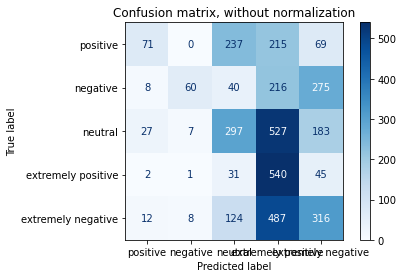

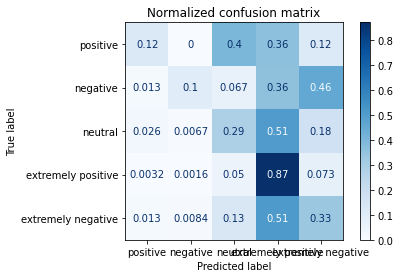

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

# Specify target names since the y is label encoded
target_names = ['positive', 'negative', 'neutral', 'extremely positive', 'extremely negative']
# Plot non-normalized confusion matrix and normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
# Loop over the two cases of confusion matrix
for title, normalize in titles_options:
    disp = plot_confusion_matrix(pipeline, corona_test['tweet_Texts'], corona_test['Sentiment'],
                                 display_labels= target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [35]:
from sklearn.metrics import classification_report
# Predict the test data  
y_pred = pipeline.predict(corona_test['tweet_Texts'])
# Print out the report
print(classification_report(corona_test['Sentiment'], y_pred, target_names = target_names))

                    precision    recall  f1-score   support

          positive       0.59      0.12      0.20       592
          negative       0.79      0.10      0.18       599
           neutral       0.41      0.29      0.34      1041
extremely positive       0.27      0.87      0.41       619
extremely negative       0.36      0.33      0.34       947

          accuracy                           0.34      3798
         macro avg       0.48      0.34      0.29      3798
      weighted avg       0.46      0.34      0.30      3798



## 17. Building Second Model
Now we will build a second model, but this time we will do a grid search to determine the optimal hyperparameters.

In [36]:
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Create pipeline using ceaner, tf-idf and decision tree
pipeline = Pipeline ([("vectorizer", TfidfVectorizer()),
                 ("classifier", RandomForestClassifier())])

# We will add in some hyperparameters to the vectorizer, and also look at different kernels and gamma values for the model
parameters = {
    'vectorizer__ngram_range': ((1,1), (1,2)),
    'vectorizer__max_df':(0.5, 1.0),
    'vectorizer__norm': ('l1', 'l2'),
    'vectorizer__stop_words': ['english', None],
    'classifier__n_estimators': (10, 50, 100),
    'classifier__max_depth': (5, None)
}

# Perform gridsearch CV
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

print("Performing grid search...")
print("The pipeline contains:", [name for name, _ in pipeline.steps])
print("parameters are as follows:")
pprint(parameters)
grid_search.fit(corona_train_sample['tweet_Texts'], corona_train_sample['Sentiment'])
print()

print(f"Best score= {grid_search.best_score_:0.3f}")
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
The pipeline contains: ['vectorizer', 'classifier']
parameters are as follows:
{'classifier__max_depth': (5, None),
 'classifier__n_estimators': (10, 50, 100),
 'vectorizer__max_df': (0.5, 1.0),
 'vectorizer__ngram_range': ((1, 1), (1, 2)),
 'vectorizer__norm': ('l1', 'l2'),
 'vectorizer__stop_words': ['english', None]}
Fitting 5 folds for each of 96 candidates, totalling 480 fits

Best score= 0.469
Best parameters set:
	classifier__max_depth: None
	classifier__n_estimators: 100
	vectorizer__max_df: 0.5
	vectorizer__ngram_range: (1, 1)
	vectorizer__norm: 'l1'
	vectorizer__stop_words: None


## 18. Second Model Analysis
The second model shows test accuracy of slightly better than the first model, particularly with correctly identifying non-extreme positive and negative sentiment. This slight improvement makes sense, as it's checked the hyperparameters and chosen those that are most effective, but the model at its core is very similar. Interestingly, it has determined that unigrams only is more effective for predicting sentiment than unigrams and bigrams. 

Confusion matrix, without normalization
[[183   5 229  68 107]
 [ 13 169  45  50 322]
 [ 90  29 389 268 265]
 [  5   4  64 431 115]
 [ 28  57 156 210 496]]
Normalized confusion matrix
[[0.30912162 0.00844595 0.38682432 0.11486486 0.18074324]
 [0.02170284 0.28213689 0.07512521 0.08347245 0.5375626 ]
 [0.08645533 0.02785783 0.37367915 0.25744476 0.25456292]
 [0.00807754 0.00646204 0.10339257 0.69628433 0.18578352]
 [0.02956705 0.06019007 0.16473073 0.2217529  0.52375924]]


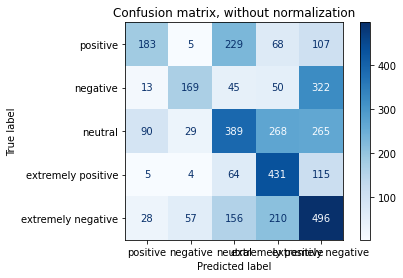

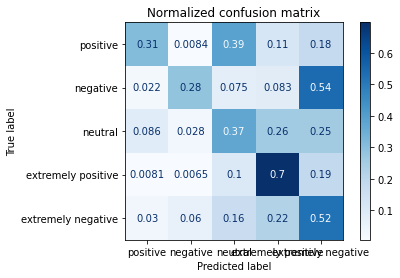

In [37]:
# Plot non-normalized confusion matrix and normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
# Loop over the two cases of confusion matrix
for title, normalize in titles_options:
    disp = plot_confusion_matrix(grid_search, corona_test['tweet_Texts'], corona_test['Sentiment'],
                                 display_labels= target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [38]:
# Predicting with test dataset
y_pred = grid_search.predict(corona_test['tweet_Texts'])
# Print report
print(classification_report(corona_test['Sentiment'], y_pred, target_names = target_names))

                    precision    recall  f1-score   support

          positive       0.57      0.31      0.40       592
          negative       0.64      0.28      0.39       599
           neutral       0.44      0.37      0.40      1041
extremely positive       0.42      0.70      0.52       619
extremely negative       0.38      0.52      0.44       947

          accuracy                           0.44      3798
         macro avg       0.49      0.44      0.43      3798
      weighted avg       0.47      0.44      0.43      3798



## 19. Building the Third Model
Now we will build a third model, but this time we will not only tune the hyperparameters, but look at whether a logistic regression or SVC model may be more effective.

In [39]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator

# Define the estimator class to handle different classifiers
class ClfSwitcher(BaseEstimator):
    # Initialize the estimator using LogisticRegression
    def __init__(
        self, 
        estimator = LogisticRegression(),
    ):

        self.estimator = estimator

    # Fit the model using the given estimator
    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self

    # Predict the label using the given estimator
    def predict(self, X, y=None):
        return self.estimator.predict(X)

    # Predict the probability using the given estimator
    def predict_proba(self, X):
        return self.estimator.predict_proba(X)

    # Compute the score using the given estimator
    def score(self, X, y):
        return self.estimator.score(X, y)

## 20. Third Model Analysis
The third model has ended up being a logistic regression model, and we can see the improvement in the confusion matrix in the higher ability to recognize positive and negative sentiment, and then to distinguish the extreme sentiments from the non-extreme sentiments. This logistic regression model, with the hyperparameters specified below, would be the model that I would choose to use.

In [40]:
# Create the pipeline of cleaner, tfidf and classifier to be specified by ClfSwitcher
pipeline = Pipeline ([("vectorizer", TfidfVectorizer()),
                 ("classifier", ClfSwitcher())])

# Create the hyperparameters using the following format
# For the cleaner and vectorizer:
# Estimator/transformer name__(double understore) corresponding parameter : potential parameter
# The classifier handling different classifiers has two levels
# classifier__estimator__corresponding parameter : potential parameter
parameters = [
    {
        'vectorizer__max_df': [0.5, 1.0],
        'vectorizer__norm': ('l1', 'l2'),
        'vectorizer__stop_words': ['english', None],
        'classifier__estimator': [LogisticRegression()],
        'classifier__estimator__solver': ('sag', 'saga'),
        'classifier__estimator__penalty': ('l2', 'none')
    },
    {
        'vectorizer__max_df': [0.5, 1.0],
        'vectorizer__norm': ('l1', 'l2'),
        'vectorizer__stop_words': ['english', None],
        'classifier__estimator': [SVC()],
        'classifier__estimator__kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
        'classifier__estimator__gamma': ('scale', 'auto')
    },
        {
        'vectorizer__max_df': [0.5, 1.0],
        'vectorizer__norm': ('l1', 'l2'),
        'vectorizer__stop_words': ['english', None],
        'classifier__estimator': [RandomForestClassifier()],
        'classifier__estimator__n_estimators': (10, 50, 100),
        'classifier__estimator__max_depth': (5, None)
    }
]


print("Performing grid search...")
print("The pipeline contains:", [name for name, _ in pipeline.steps])
print("parameters are as follows:")
pprint(parameters)

# Perform gridsearch CV
gscv = GridSearchCV(pipeline, parameters, cv=5, n_jobs= -1, return_train_score=False, verbose=3)
gscv.fit(corona_train_sample['tweet_Texts'], corona_train_sample['Sentiment'])

Performing grid search...
The pipeline contains: ['vectorizer', 'classifier']
parameters are as follows:
[{'classifier__estimator': [LogisticRegression()],
  'classifier__estimator__penalty': ('l2', 'none'),
  'classifier__estimator__solver': ('sag', 'saga'),
  'vectorizer__max_df': [0.5, 1.0],
  'vectorizer__norm': ('l1', 'l2'),
  'vectorizer__stop_words': ['english', None]},
 {'classifier__estimator': [SVC()],
  'classifier__estimator__gamma': ('scale', 'auto'),
  'classifier__estimator__kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
  'vectorizer__max_df': [0.5, 1.0],
  'vectorizer__norm': ('l1', 'l2'),
  'vectorizer__stop_words': ['english', None]},
 {'classifier__estimator': [RandomForestClassifier()],
  'classifier__estimator__max_depth': (5, None),
  'classifier__estimator__n_estimators': (10, 50, 100),
  'vectorizer__max_df': [0.5, 1.0],
  'vectorizer__norm': ('l1', 'l2'),
  'vectorizer__stop_words': ['english', None]}]
Fitting 5 folds for each of 144 candidates, totalling 720 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('classifier', ClfSwitcher())]),
             n_jobs=-1,
             param_grid=[{'classifier__estimator': [LogisticRegression()],
                          'classifier__estimator__penalty': ('l2', 'none'),
                          'classifier__estimator__solver': ('sag', 'saga'),
                          'vectorizer__max_df': [0.5, 1.0],
                          'vectorizer__norm': ('l1', 'l2'),
                          'vectorizer__sto...
                          'vectorizer__max_df': [0.5, 1.0],
                          'vectorizer__norm': ('l1', 'l2'),
                          'vectorizer__stop_words': ['english', None]},
                         {'classifier__estimator': [RandomForestClassifier()],
                          'classifier__estimator__max_depth': (5, None),
                          'classifier__estimator__n_estimators': (10, 50, 

In [41]:
print(f"Best score= {gscv.best_score_:0.3f}")

best_parameters = gscv.best_estimator_.get_params()

# loop over the parameters and get all potential algorithms in the pipeline
all_classifiers =[]
for parameter in parameters:
    all_classifiers.append(parameter['classifier__estimator'])
all_classifiers = [str(alg) for clf in all_classifiers for alg in clf]
print("All potential classifiers:")
pprint(all_classifiers)

# Find the location/index of the optimal classifier
idx = all_classifiers.index(str(best_parameters['classifier__estimator']))
print("Best parameters set:")
for param_name in sorted(parameters[idx].keys()):
    # https://stackoverflow.com/questions/2354329/what-is-the-meaning-of-r
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score= 0.513
All potential classifiers:
['LogisticRegression()', "SVC(kernel='linear')", 'RandomForestClassifier()']
Best parameters set:
	classifier__estimator: SVC(kernel='linear')
	classifier__estimator__gamma: 'scale'
	classifier__estimator__kernel: 'linear'
	vectorizer__max_df: 0.5
	vectorizer__norm: 'l2'
	vectorizer__stop_words: None


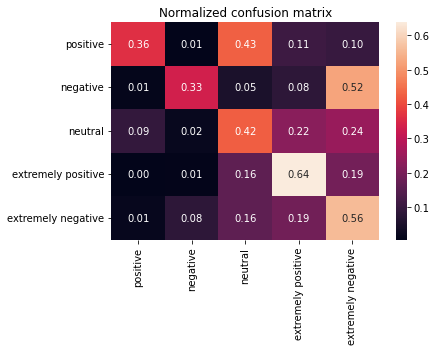

In [42]:
from sklearn.metrics import confusion_matrix
# Predict the labels of the test dataset
y_pred = gscv.predict(corona_test['tweet_Texts'])
# Generate the confusion matrix
cm = confusion_matrix(corona_test['Sentiment'], y_pred)
# Normalize the confusion matrix
cm = cm / cm.astype(np.float64).sum(axis=1)[:,None]
# Plot the heatmap of the normalized confusion matrix
ax = plt.axes()
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(cm, annot=True, fmt = '.2f', xticklabels = target_names, yticklabels = target_names)
ax.set_title("Normalized confusion matrix")
plt.show()

## 21. LDA Using CountVectorizer
In this section we will use CountVectorizer to do LDA analysis on the data.

In [43]:
tf_vectorizer = CountVectorizer(max_df=0.90, min_df=5, stop_words='english')
# Create document word matrix
document_word_matrix_tf = tf_vectorizer.fit_transform(corona_train['tweet_Texts'])

In [44]:
from sklearn.decomposition import LatentDirichletAllocation

# Specify the number of topics using n_components and fix the seed
lda = LatentDirichletAllocation(n_components= 5, random_state= 101)
lda.fit(document_word_matrix_tf)

LatentDirichletAllocation(n_components=5, random_state=101)

In [45]:
n_top_words = 15 
# Loop over each topic
for index,topic in enumerate(lda.components_):
    print(f'THE TOP {n_top_words} WORDS FOR TOPIC #{index}')
    # Get the top word for a given topics using list comprehension
    # We rank the values using argsort and take out the corresponding indices
    # Finally obtain the corresponding feature names (word) using the indices
    print([tf_vectorizer.get_feature_names()[j] for j in topic.argsort()[-n_top_words:]])
    #Seperate each topic using #
    print('#'*150)

THE TOP 15 WORDS FOR TOPIC #0
['global', 'change', 'amp', 'crisis', 'coronavirus', 'low', 'impact', 'market', 'pandemic', 'oil', 'new', 'covid', 'consumer', '19', 'price']
######################################################################################################################################################
THE TOP 15 WORDS FOR TOPIC #1
['service', 'social', 'staff', 'coronavirus', '19', 'worker', 'new', 'people', 'shop', 'united', 'amp', 'delivery', 'shopping', 'supermarket', 'online']
######################################################################################################################################################
THE TOP 15 WORDS FOR TOPIC #2
['pandemic', 'consumer', 'product', 'help', 'india', 'increase', 'supply', 'amp', 'demand', 'covid', 'sanitizer', 'hand', '19', 'price', 'food']
######################################################################################################################################################
THE TOP 15 WORDS 

## 22. Plotting Top 15 Words for Each Topic
Now we will visualize the topics by plotting the number of occurrences of each of the top 15 words for each topic.

In [46]:
import matplotlib.pyplot as plt
def plot_top_words(model, feature_names, n_top_words, title):
    # We specify 4 topics, then we setup the number of subplot =2*2 
    fig, axes = plt.subplots(2, 3, figsize=(30, 15), sharex=True)
    # Flatten the axes to 1 D vector, then we can loop it easily instead of using a nested loop for rows and columns
    axes = axes.flatten()
    
    # Loop over all the topics
    for topic_idx, topic in enumerate(model.components_):
        # Rank the values and take out the corresponding indices
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        # Take out the top features using the indices
        top_features = [feature_names[i] for i in top_features_ind]
        # Get the weights
        weights = topic[top_features_ind]
        # Take out hte axes from the flattened 1D vector
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        # Remove the top, right and left axis in matplotlib
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

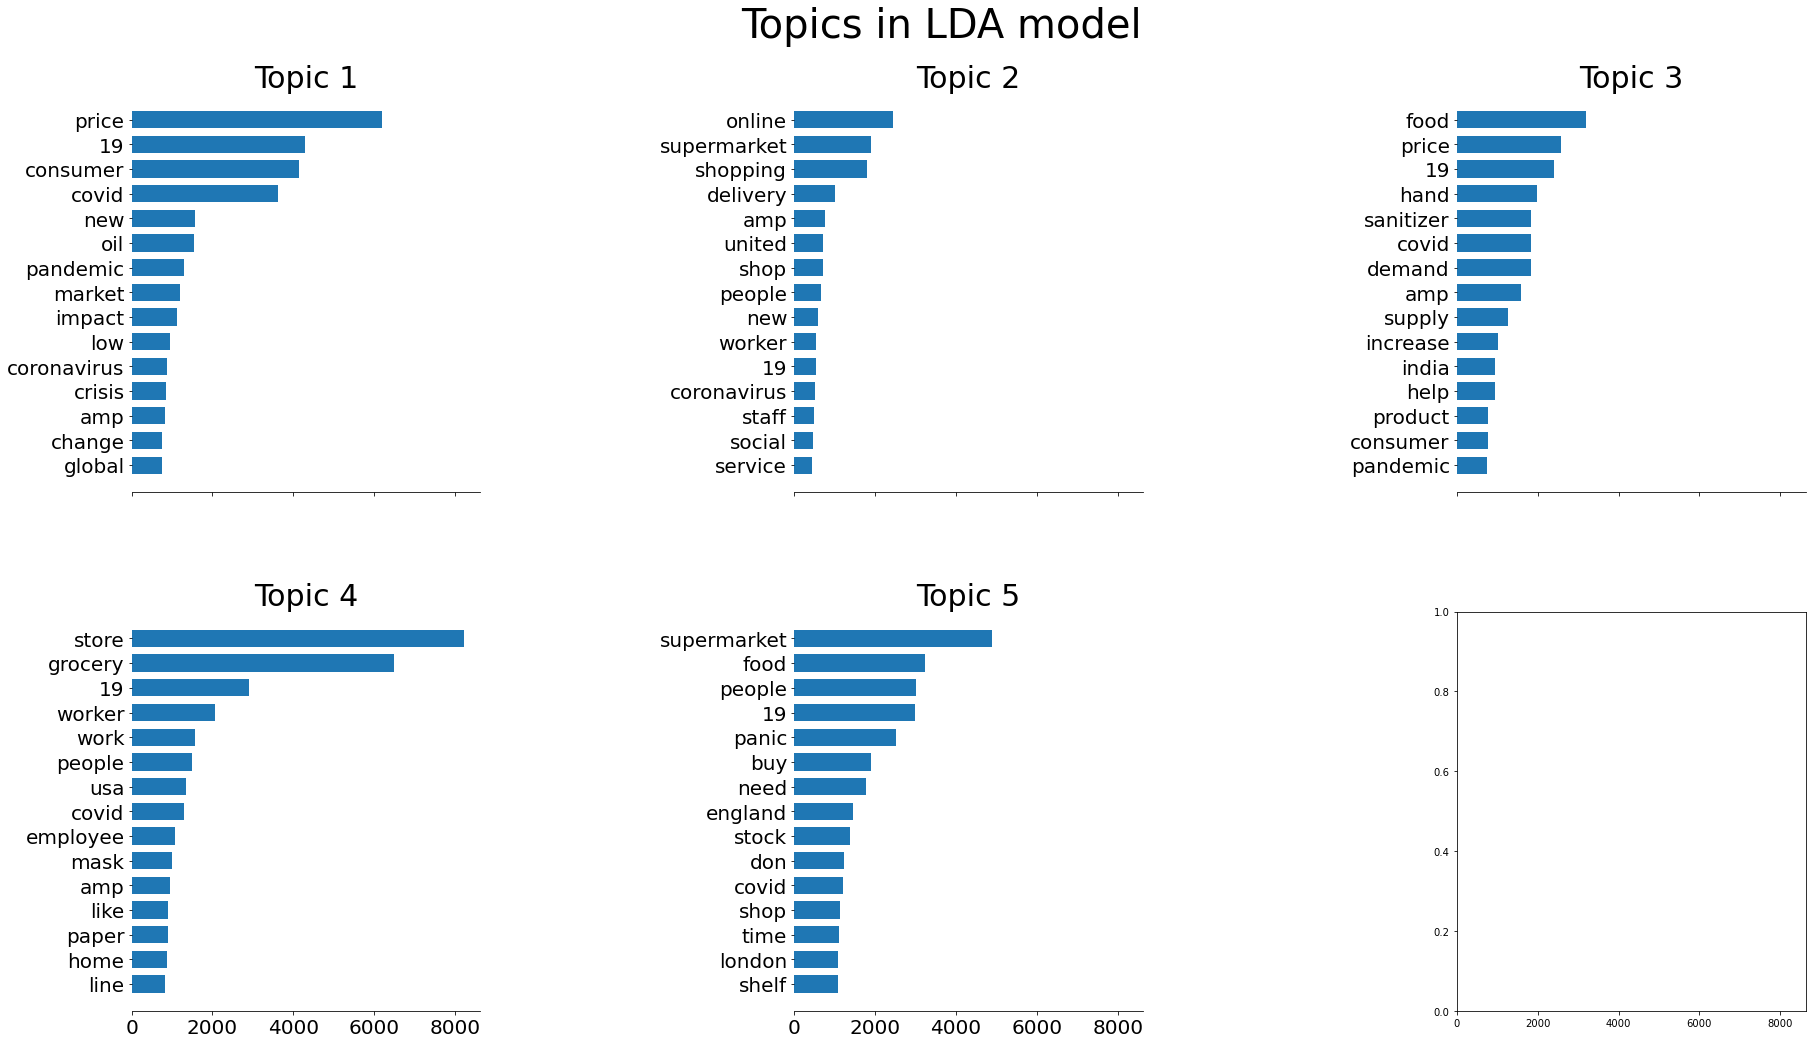

In [47]:
tf_feature_names = tf_vectorizer.get_feature_names()
plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')

## 23. LDA Using TF-IDF Vectorizer
Now we will do LDA analysis using a tf-idf vectorizer instead of CountVectorizer.

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation


# Generate the document word matrix using tfidf
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', # Remove the stop words
                                lowercase = True, # Convert the tokes to lower cases
                                # Specif the token using regular expression to consider tokens of 2 for more alphanumeric characters
                                token_pattern = r'\b[a-zA-Z0-9]{2,}\b', 
                                max_df = 0.9, 
                                min_df = 5)
document_word_matrix_tf_idf = tfidf_vectorizer.fit_transform(corona_train['tweet_Texts'])

In [49]:
# Build the LDA model
lda_tf_idf = LatentDirichletAllocation(n_components= 5, random_state= 101)
lda_tf_idf.fit(document_word_matrix_tf_idf)

LatentDirichletAllocation(n_components=5, random_state=101)

## 24. Plotting Top 15 Words for Each Topic
Now we will visualize the topics by plotting the number of occurrences of each of the top 15 words for each topic.

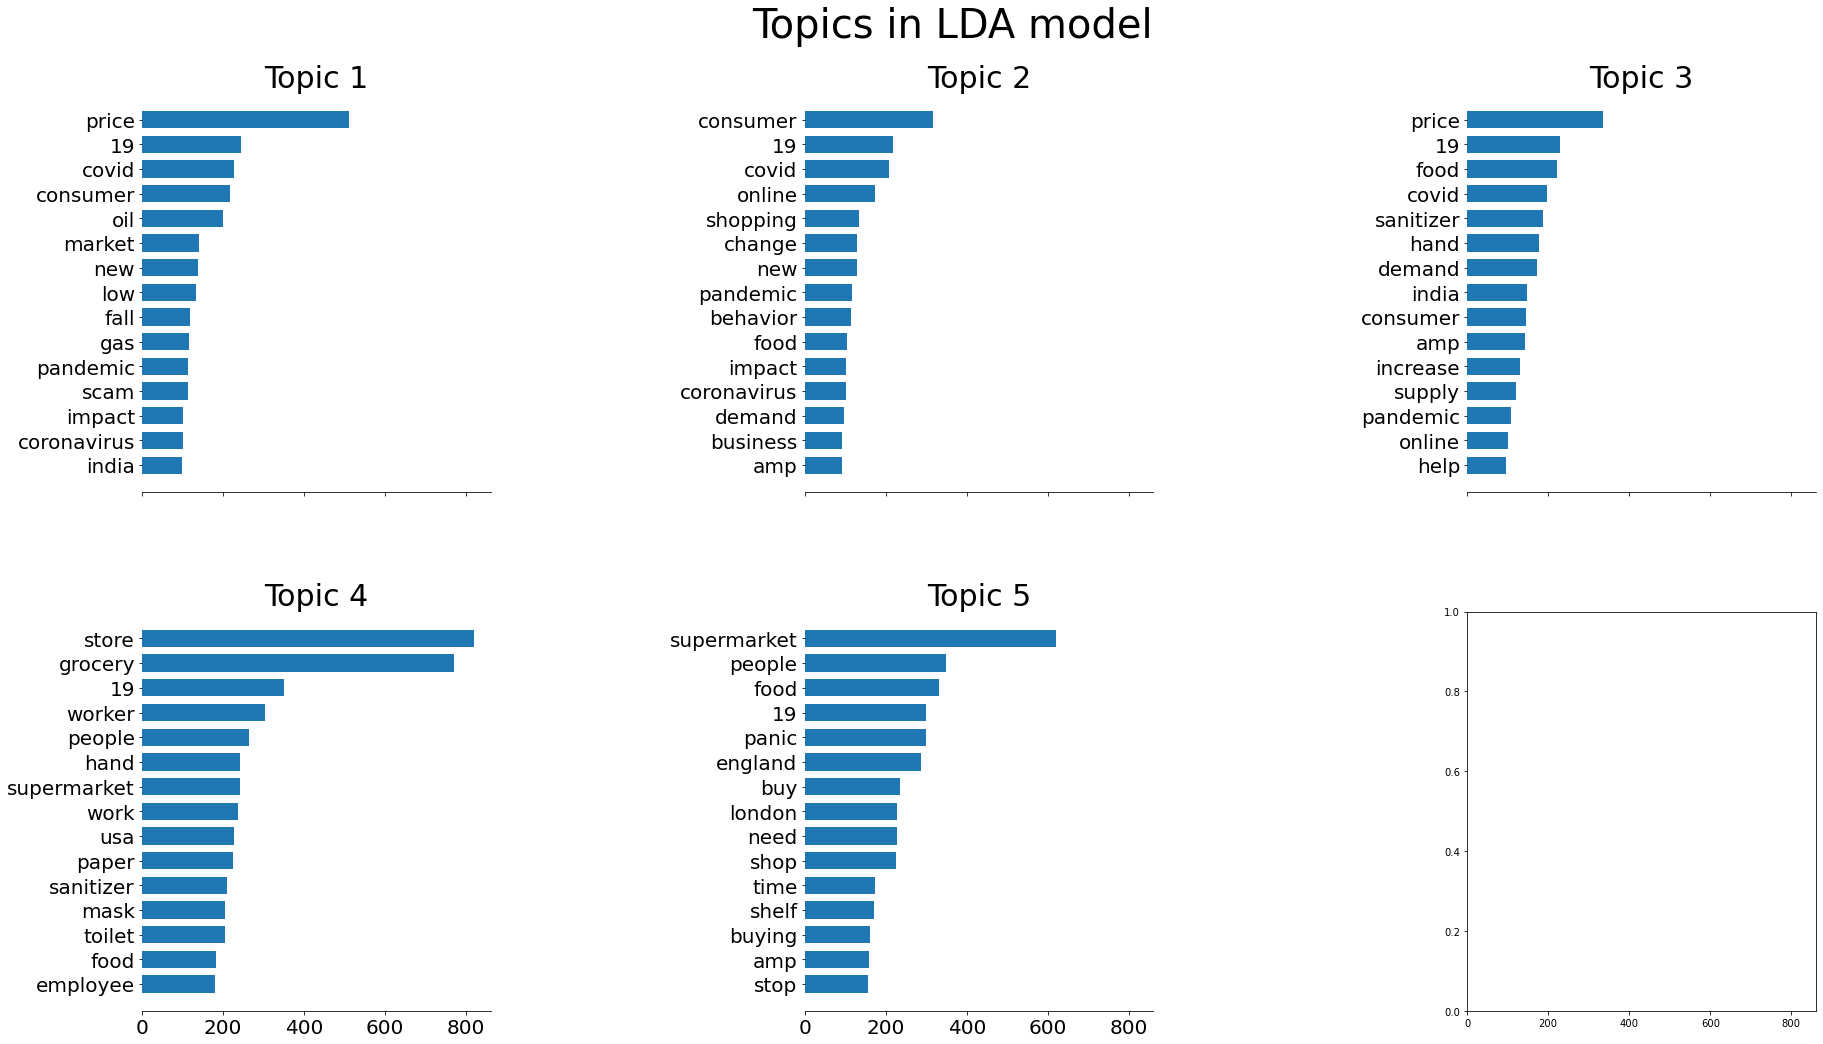

In [50]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
plot_top_words(lda_tf_idf, tfidf_feature_names, n_top_words, 'Topics in LDA model')

## 25. Dimension Reduction Visualization of LDA Analysis
Finally, we will visualize the second topic using dimension reduction.

In [51]:
import pyLDAvis
import pyLDAvis.sklearn
# Enable automatic D3 display of prepared model data in the IPython notebook.
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model = lda_tf_idf, dtm = document_word_matrix_tf_idf, vectorizer = tfidf_vectorizer, mds='mmds')

C:\Users\adog1\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.163594  0.001843       1        1  25.079304
4      0.102752  0.121261       2        1  23.568287
2     -0.108496 -0.044878       3        1  18.735060
0     -0.152038  0.080465       4        1  18.084102
1     -0.005812 -0.158691       5        1  14.533247, topic_info=             Term        Freq       Total Category  logprob  loglift
3235      grocery  836.000000  836.000000  Default  30.0000  30.0000
5503        price  989.000000  989.000000  Default  29.0000  29.0000
1702     consumer  693.000000  693.000000  Default  28.0000  28.0000
6742        store  963.000000  963.000000  Default  27.0000  27.0000
6851  supermarket  889.000000  889.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
5893       report   57.187288  200.977379   Topic5  -5.8844   0.6719
7100         time   60.713845  468.852493   Topic5  -5.8246  -0.1154
3140       global   54.556820  187.905427   Topic5  -5.9315   0.6920
6851  supermarket   63.101558  889.199841   Topic5  -5.7860  -0.7168
4277       london   55.712297  347.390929   Topic5  -5.9105   0.0985

[424 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
63        1  0.248292         19
63        2  0.216962         19
63        3  0.172317         19
63        4  0.184849         19
63        5  0.177799         19
...     ...       ...        ...
7805      5  0.215791       york
7807      2  0.965355  yorkshire
7820      2  0.817462    zealand
7820      4  0.034061    zealand
7820      5  0.136244    zealand

[874 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 3, 1, 2])